In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scvelo as scv
#import cellrank as cr
import matplotlib.pyplot as plt

In [3]:
#Load the Integrated Lung Anndata
adata = sc.read_h5ad('lung_heoa_3khvg.h5ad')

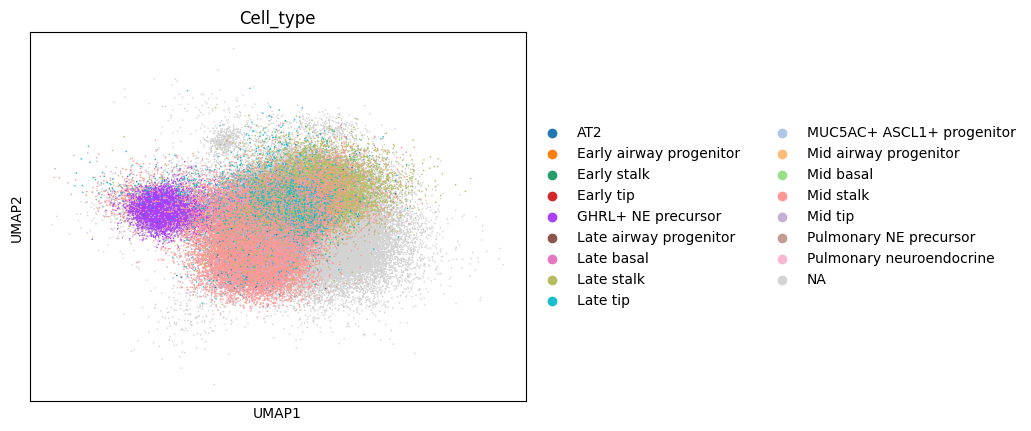

In [3]:
sc.pl.umap(adata, color='Cell_type', size=5)

##This is the wrong umap

In [4]:
#UMAP in the integrated lung object is not the representation that is wanted
#UMAP in the object is X_scPoli
adata.obsm['X_scPoli'] = adata.obsm['X_umap']

In [5]:
#Change X_umap to the umap model provided by Sooror
import umap.umap_ as umap
#load the UMAP model
#UMAP with standardized model
model = umap.UMAP(n_neighbors=5, random_state=42, min_dist=0.5).fit(adata.obsm['X_umap'])
adata.obsm['X_umap'] = model.transform(adata.obsm['X_umap'])

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [6]:
# import joblib
# joblib.dump(model, 'lung_epithelial_umap_model.sav')
# umap_model = joblib.load('lung_epithelial_umap_model.sav')
# adata_int_lung.obsm['X_umap'] = umap_model.transform(adata_int_lung.obsm['X_umap'])

In [7]:
print(adata.obsm['X_umap'].shape)
print(adata.obsm['X_scPoli'].shape)

(225487, 2)
(225487, 30)


In [128]:
adata.obs.level_2.unique().tolist()

['basal cells',
 'club cells',
 'ciliated cells',
 'alveolar type 1 (AT1) cells',
 'alveolar type 2 (AT2) cells',
 'neuroendocrine cells',
 'airway secretory cells',
 'goblet cells',
 'stem cells']

In [140]:
sc.pl.umap(adata, color='level_2',size=, legend_loc='right')

SyntaxError: invalid syntax (914556616.py, line 1)

In [139]:
sc.pp.neighbors(adata)
sc.tl.leiden(adata)

         Falling back to preprocessing with `sc.pp.pca` and default params.


In [11]:
cell_type_colors = {
    'basal cells': '#16f648',
    'club cells': '#795548',
    'ciliated cells': '#1c15bc',
    'alveolar type 1 (AT1) cells': '#85C1E9',
    'alveolar type 2 (AT2) cells': '#f1f847',
    'neuroendocrine cells': '#8F4646',
    'airway secretory cells': '#a8bade',
    'goblet cells': '#8e3101',
    'stem cells': '#225805'
}

In [ ]:
sc.pl.umap(adata, color='leiden', palette=cell_type_colors, size=5, frameon=False)

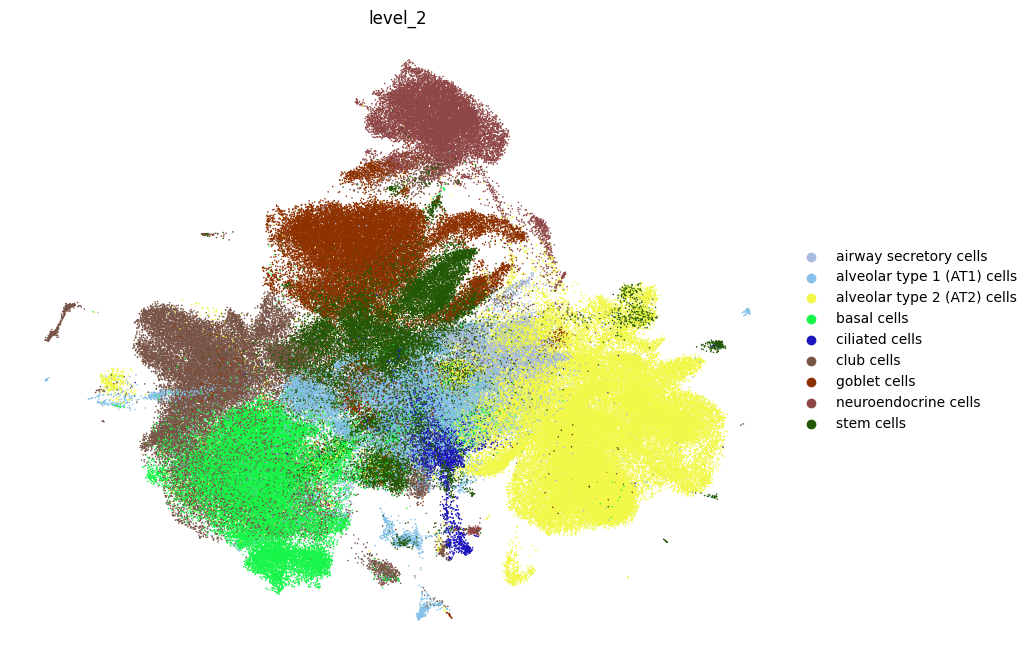

In [142]:
sc.pl.umap(adata, color='level_2', palette=cell_type_colors, size=5, frameon=False)

In [165]:
adata.obs.derive

cells
AAACCCACAAAGCTAA-132    ASC
AAACCCACACTGTGTA-132    ASC
AAACCCATCCGCAGTG-132    ASC
AAACCCATCTAGTGTG-132    ASC
AAACGAACAACTCCCT-132    ASC
                       ... 
TTTGATCAGTCTAGCT-183    IPS
TTTGATCCAACATACC-183    IPS
TTTGGAGAGGAGAGGC-183    IPS
TTTGGTTAGTGCAGCA-183    IPS
TTTGTTGCACATGAAA-183    IPS
Name: derive, Length: 225487, dtype: category
Categories (3, object): ['ASC', 'FSC', 'IPS']

In [162]:
len(adata.obs.sample_id.unique().tolist())

52

In [76]:
adata.obs

,initial_size_spliced,initial_size_unspliced,initial_size,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,total_counts_hb,...,detail_tissue,time,time2,main_cells,protocol,tech,tech_detail,molecular,gel,conditions_combined
cells,,,,,,,,,,,,,,,,,,,,,
AAACCCACAAAGCTAA-132,31397.0,14368.0,31397.0,6808,39508.0,4868.0,12.321555,7983.0,20.206034,1.0,...,bronchial,NaN,NaN,nan,nan,10x,10x_v3,nan,nan,nan
AAACCCACACTGTGTA-132,24573.0,8025.0,24573.0,4675,31483.0,3729.0,11.844487,7484.0,23.771559,0.0,...,bronchial,NaN,NaN,nan,nan,10x,10x_v3,nan,nan,nan
AAACCCATCCGCAGTG-132,21147.0,6246.0,21147.0,4822,26328.0,2810.0,10.673048,5713.0,21.699331,2.0,...,bronchial,NaN,NaN,nan,nan,10x,10x_v3,nan,nan,nan
AAACCCATCTAGTGTG-132,8687.0,3785.0,8687.0,2726,11182.0,632.0,5.651941,3580.0,32.015739,0.0,...,bronchial,NaN,NaN,nan,nan,10x,10x_v3,nan,nan,nan
AAACGAACAACTCCCT-132,11375.0,5798.0,11375.0,3956,14544.0,1113.0,7.652640,4326.0,29.744226,0.0,...,bronchial,NaN,NaN,nan,nan,10x,10x_v3,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGATCAGTCTAGCT-183,9504.0,21130.0,9504.0,4459,11821.0,2224.0,18.813974,739.0,6.251586,0.0,...,NaN,0day,0day,nan,nan,10x,10x_v3,nan,nan,nan
TTTGATCCAACATACC-183,50587.0,52023.0,50587.0,8910,61103.0,1360.0,2.225750,11083.0,18.138226,5.0,...,NaN,0day,0day,nan,nan,10x,10x_v3,nan,nan,nan
TTTGGAGAGGAGAGGC-183,9358.0,9525.0,9358.0,3935,10915.0,2025.0,18.552450,1227.0,11.241410,1.0,...,NaN,0day,0day,nan,nan,10x,10x_v3,nan,nan,nan


In [34]:
df_asc = pd.crosstab(adata[adata.obs.derive == 'ASC'].obs['sample_id'], adata[adata.obs.derive == 'ASC'].obs['level_2'])
df_fsc = pd.crosstab(adata[adata.obs.derive == 'FSC'].obs['sample_id'], adata[adata.obs.derive == 'FSC'].obs['level_2'])
df_ips = pd.crosstab(adata[adata.obs.derive == 'IPS'].obs['sample_id'], adata[adata.obs.derive == 'IPS'].obs['level_2'])

In [40]:
df_asc_norm = df_asc.div(df_asc.sum(axis=1), axis=0)
df_fsc_norm = df_fsc.div(df_fsc.sum(axis=1), axis=0)
df_ips_norm = df_ips.div(df_ips.sum(axis=1), axis=0)

In [41]:
df_asc_norm.head()

level_2,airway secretory cells,alveolar type 1 (AT1) cells,alveolar type 2 (AT2) cells,basal cells,ciliated cells,club cells,goblet cells,neuroendocrine cells,stem cells
sample_id,,,,,,,,,
Chan_NatCommun_2022_bronchial_organoids,0.000000,0.029953,0.000000,0.438252,0.04984,0.481954,0.0,0.000000,0.0
Chan_NatCommun_2022_nasopharyngeal_organoids,0.000000,0.000000,0.000000,0.604027,0.03132,0.364653,0.0,0.000000,0.0
Hoffmann_CommunBiol_2022_AO15_HT2_16h_control,0.000000,0.000000,0.096287,0.510594,0.00000,0.393119,0.0,0.000000,0.0
Hoffmann_CommunBiol_2022_AO15_pool_16h_control,0.000000,0.098025,0.000000,0.209973,0.00000,0.692002,0.0,0.000000,0.0
Hoffmann_CommunBiol_2022_AO16_HT2_16h_control,0.031707,0.000000,0.600000,0.070732,0.00000,0.263415,0.0,0.034146,0.0


In [ ]:
ax = df_norm.plot(kind='bar', stacked=True, figsize=(10, 6))
# Set plot labels and title
plt.xlabel('Sample ID')
plt.ylabel('Normalized Counts')
plt.title('Normalized Cell Type Counts by Sample ID')

# Show the legend
plt.legend(title='Cell Type')

# Show the plot
plt.show()

In [53]:
%matplotlib inline

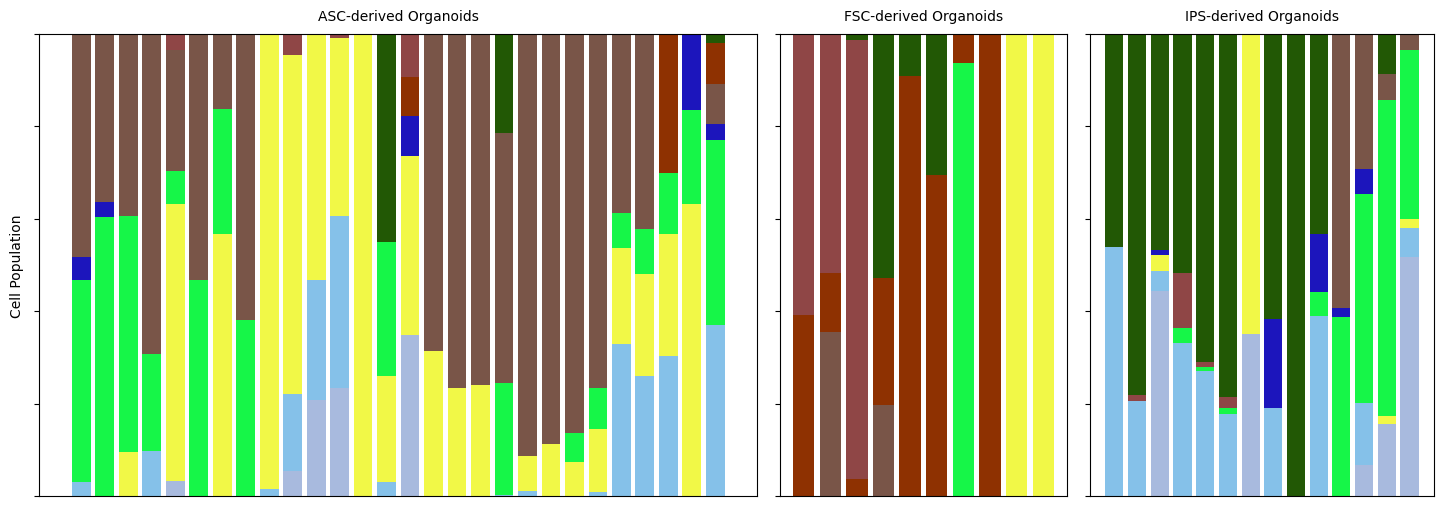

In [75]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharex=False, sharey=True, gridspec_kw={'width_ratios': [2.5, 1, 1.2], 'wspace' : 0.05})

# List of the DataFrames you want to plot
dfs = [df_asc_norm, df_fsc_norm, df_ips_norm]

# List of labels to be used in each subplot
labels = ['ASC-derived Organoids', 'FSC-derived Organoids', 'IPS-derived Organoids']

# Iterate over the DataFrames and labels, and plot each DataFrame on its respective subplot
for i, (df, label) in enumerate(zip(dfs, labels)):
    # Get the sample IDs from the DataFrame
    sample_ids = df.index

    # Get the columns (cell types) from the DataFrame
    cell_types = df.columns

    # Calculate the cumulative sums for each cell type
    bottom = [0] * len(sample_ids)
    for cell_type in cell_types:
        counts = df[cell_type]
        axs[i].bar(sample_ids, counts, bottom=bottom, color=cell_type_colors[cell_type])
        bottom = [b + c for b, c in zip(bottom, counts)]

    # Set plot labels and title for each subplot
    axs[i].set_xticks([])
    axs[i].set_xticklabels([])
    # Remove ticks for y-axis except for the first subplot
    #if i > 0:
    #    axs[i].tick_params(left=False)
     
    axs[i].set_xlabel(label, labelpad=10)
    axs[i].xaxis.set_label_position('top')
    if i == 0:
        axs[i].set_ylabel('Cell Population')
    else:
        axs[i].set_yticklabels([]) 
# Adjust the layout to avoid overlapping titles and x-axis labels
#plt.tight_layout()
# Show the plot
plt.show()

In [9]:
#Pseudotime analysis
sc.pp.neighbors(adata, use_rep='X_scPoli' )
sc.tl.diffmap(adata)

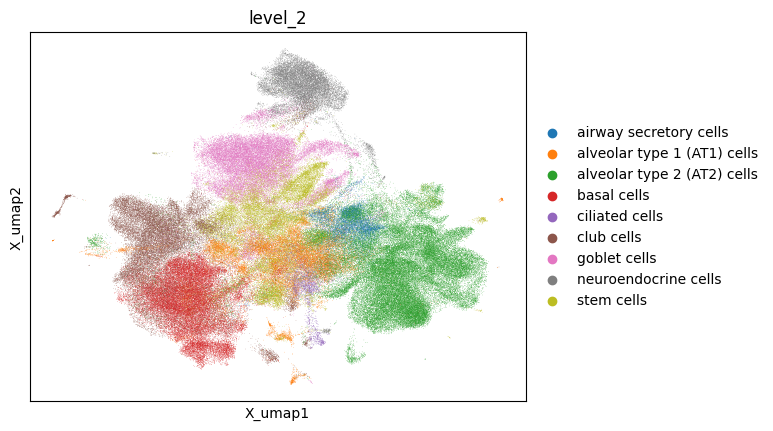

In [10]:
sc.pl.embedding(adata, basis='X_umap', color='level_2')


In [11]:
adata.obs.groupby('level_2').size()

level_2
airway secretory cells          7392
alveolar type 1 (AT1) cells    18921
alveolar type 2 (AT2) cells    63192
basal cells                    32893
ciliated cells                  3041
club cells                     30613
goblet cells                   27694
neuroendocrine cells           14548
stem cells                     27193
dtype: int64

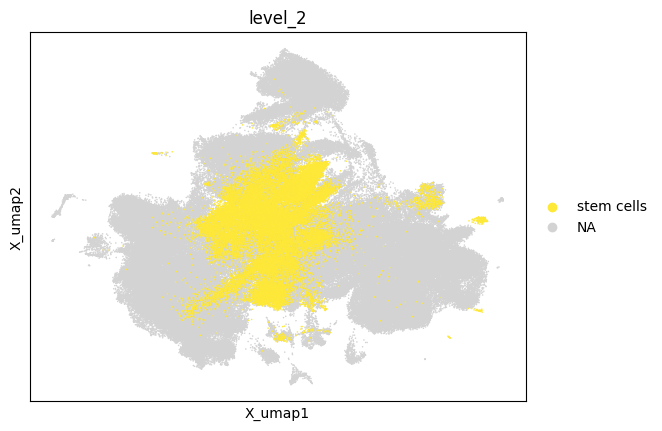

In [12]:
sc.pl.embedding(adata, basis='X_umap', color='level_2', groups=['stem cells'], size=5, palette='cividis')
#Select a cell as a root cell from the stem cells

In [13]:
adata.obs.columns

Index(['initial_size_spliced', 'initial_size_unspliced', 'initial_size',
       'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt',
       'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb',
       'pct_counts_hb', 'n_genes', 'sample_id', 'level_1', 'level_2',
       'level_3', 'sort_batch', 'Cell_type', 'n_counts', 'batch',
       'publication', 'sample_name', 'tissue', 'derive', 'detail_tissue',
       'time', 'time2', 'main_cells', 'protocol', 'tech', 'tech_detail',
       'molecular', 'gel', 'conditions_combined'],
      dtype='object')

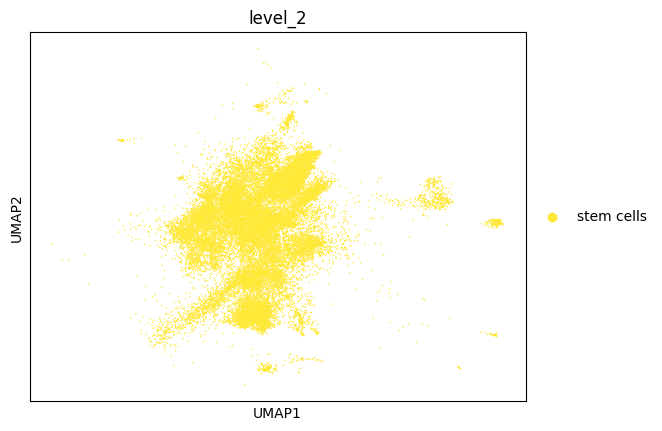

In [14]:
sc.pl.umap(adata[adata.obs.level_2 == 'stem cells'], color='level_2')

In [15]:
adata_stemcells = adata[adata.obs.level_2 == 'stem cells']

In [29]:
adata_stemcells.obs

,initial_size_spliced,initial_size_unspliced,initial_size,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,total_counts_hb,...,time,time2,main_cells,protocol,tech,tech_detail,molecular,gel,conditions_combined,leiden
cells,,,,,,,,,,,,,,,,,,,,,
AAACCTGAGAATGTTG-145,5566.0,946.0,5566.0,2292,6520.0,157.0,2.407975,1886.0,28.926382,1.0,...,NaN,NaN,nan,nan,10x,10x_v2,nan,nan,nan,0
AAACCTGAGACAGAGA-145,1170.0,398.0,1170.0,801,1426.0,128.0,8.976157,307.0,21.528751,0.0,...,NaN,NaN,nan,nan,10x,10x_v2,nan,nan,nan,0
AAACCTGAGATATACG-145,5520.0,771.0,5520.0,2427,6498.0,127.0,1.954448,1790.0,27.546936,0.0,...,NaN,NaN,nan,nan,10x,10x_v2,nan,nan,nan,0
AAACCTGAGTGCAAGC-145,3985.0,492.0,3985.0,1966,4724.0,174.0,3.683319,957.0,20.258255,0.0,...,NaN,NaN,nan,nan,10x,10x_v2,nan,nan,nan,0
AAACCTGCACTGAAGG-145,1026.0,370.0,1026.0,624,1262.0,141.0,11.172742,308.0,24.405706,0.0,...,NaN,NaN,nan,nan,10x,10x_v2,nan,nan,nan,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCCTCAGGATATGT-183,42371.0,21255.0,42371.0,8211,49810.0,2770.0,5.561132,5103.0,10.244930,5.0,...,0day,0day,nan,nan,10x,10x_v3,nan,nan,nan,0
TTTCGATGTTCTAACG-183,30912.0,40116.0,30912.0,8488,38227.0,2171.0,5.679232,2411.0,6.307060,2.0,...,0day,0day,nan,nan,10x,10x_v3,nan,nan,nan,0
TTTCGATTCCACCTCA-183,36135.0,69856.0,36135.0,7992,45867.0,3416.0,7.447620,2852.0,6.217978,4.0,...,0day,0day,nan,nan,10x,10x_v3,nan,nan,nan,0


In [30]:
sc.tl.leiden(adata_stemcells)

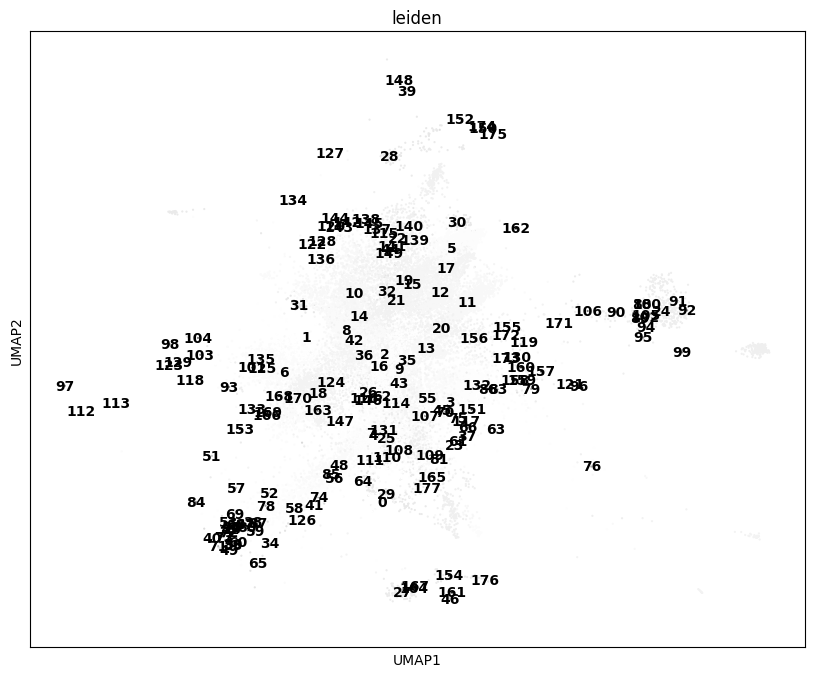

In [59]:
plt.rcParams['figure.figsize'] = (10, 8)
sc.pl.umap(adata_stemcells, color='leiden', legend_loc='on data', size=10)

In [37]:
#Check if cluster 14 is good enough for the root cell
adata_stemcells[adata_stemcells.obs.leiden=='14'].obs

,initial_size_spliced,initial_size_unspliced,initial_size,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,total_counts_hb,...,time,time2,main_cells,protocol,tech,tech_detail,molecular,gel,conditions_combined,leiden
cells,,,,,,,,,,,,,,,,,,,,,
AAAGTAGGTATATCCG-145,6636.0,591.0,6636.0,2759,7825.0,170.0,2.172524,2069.0,26.440895,0.0,...,NaN,NaN,nan,nan,10x,10x_v2,nan,nan,nan,14
AGTGGGAAGGTAAACT-145,5222.0,775.0,5222.0,2230,6096.0,241.0,3.953412,1688.0,27.690289,0.0,...,NaN,NaN,nan,nan,10x,10x_v2,nan,nan,nan,14
ATGCGATCACGGACAA-145,7585.0,1678.0,7585.0,3076,9149.0,667.0,7.290414,2196.0,24.002625,0.0,...,NaN,NaN,nan,nan,10x,10x_v2,nan,nan,nan,14
CAAGATCCATTCACTT-145,7954.0,1335.0,7954.0,2860,9377.0,252.0,2.687427,2842.0,30.308203,0.0,...,NaN,NaN,nan,nan,10x,10x_v2,nan,nan,nan,14
CGGACTGCAAGTTCTG-145,1260.0,158.0,1260.0,789,1495.0,48.0,3.210702,433.0,28.963211,0.0,...,NaN,NaN,nan,nan,10x,10x_v2,nan,nan,nan,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CTAGCCTAGCACGCCT-1-172,NaN,NaN,NaN,1517,5245.0,324.0,6.177312,1990.0,37.940895,0.0,...,46day,46day,nan,nan,10x,10x_v3,nan,nan,nan,14
GTACTTTCATGGTAGG-1-172,NaN,NaN,NaN,3048,13031.0,717.0,5.502264,4485.0,34.417927,2.0,...,46day,46day,nan,nan,10x,10x_v3,nan,nan,nan,14
AGTCACAAGCATATGA-178,6747.0,7696.0,6747.0,2460,7939.0,1572.0,19.800982,1994.0,25.116512,0.0,...,21day,21day,nan,nan,10x,10x_v3,nan,nan,nan,14


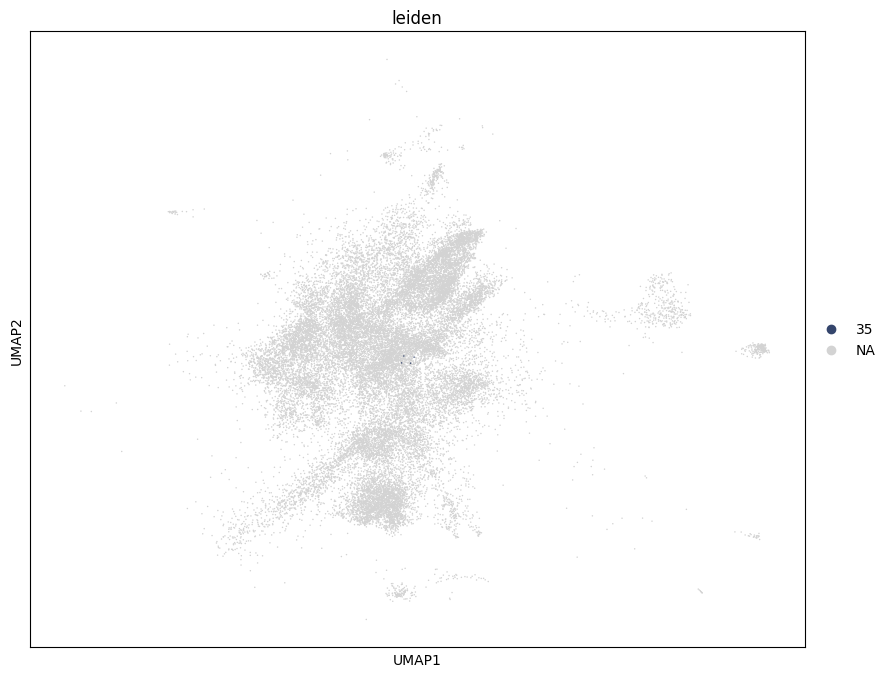

In [63]:
sc.pl.umap(adata_stemcells, color='leiden', groups=['35'], palette='cividis')

In [64]:
adata_stemcells[adata_stemcells.obs.leiden == '35'].obs
#Cluster 35 is better for the root cell

,initial_size_spliced,initial_size_unspliced,initial_size,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,total_counts_hb,...,time,time2,main_cells,protocol,tech,tech_detail,molecular,gel,conditions_combined,leiden
cells,,,,,,,,,,,,,,,,,,,,,
AACGAAATCCGACGGT-1-158,NaN,NaN,NaN,4232,16379.0,903.0,5.513157,4917.0,30.020147,3.0,...,NaN,NaN,nan,nan,10x,10x_v3,nan,nan,nan,35
TCAGGTATCCCATAAG-1-158,NaN,NaN,NaN,3471,12091.0,729.0,6.029278,3700.0,30.601274,14.0,...,NaN,NaN,nan,nan,10x,10x_v3,nan,nan,nan,35
TCCTCCCTCCGGACGT-1-158,NaN,NaN,NaN,3865,13453.0,599.0,4.452538,3830.0,28.469484,8.0,...,NaN,NaN,nan,nan,10x,10x_v3,nan,nan,nan,35
TTCATTGGTGTCTTCC-1-158,NaN,NaN,NaN,4119,13760.0,265.0,1.925872,3819.0,27.754360,0.0,...,NaN,NaN,nan,nan,10x,10x_v3,nan,nan,nan,35


In [65]:
adata_leiden35 = adata_stemcells[adata_stemcells.obs.leiden == '35']

In [70]:
root_cell = adata_leiden35[1]
#selecting the first cell as the root cell

In [71]:
adata.obs['Root_Cell'] = 0

In [73]:
adata.obs.loc['AACGAAATCCGACGGT-1-158', 'Root_Cell'] = 1 

In [94]:
adata[adata.obs.Root_Cell == 1].obs.index

Index(['AACGAAATCCGACGGT-1-158'], dtype='object', name='cells')

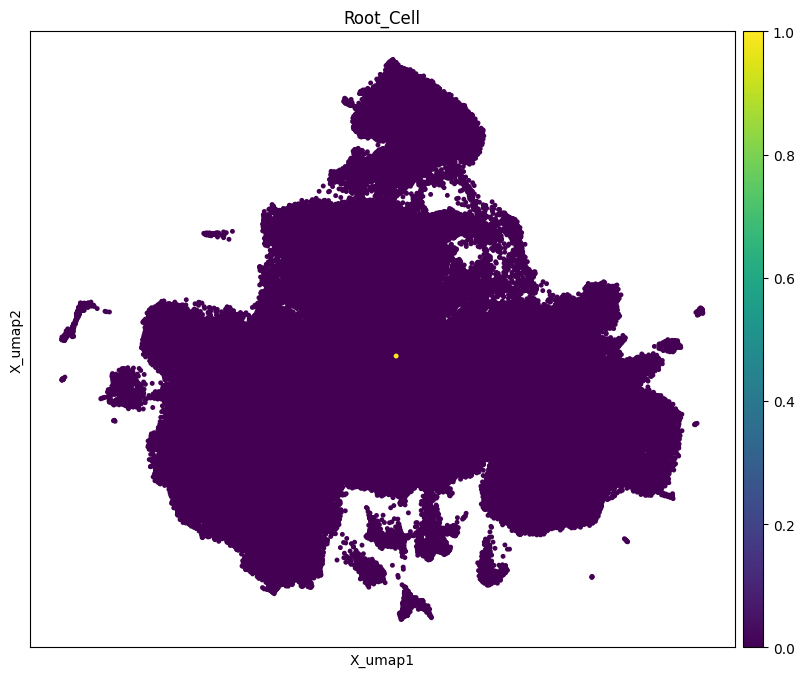

In [75]:
sc.pl.embedding(adata, basis='X_umap', color='Root_Cell', s=50)

In [118]:
root_cell_index = np.flatnonzero(adata.obs['Root_Cell'] == 1)[0]

In [119]:
adata.uns['iroot'] = root_cell_index

In [120]:
adata.uns['iroot']

101225

In [121]:
sc.tl.dpt(adata)

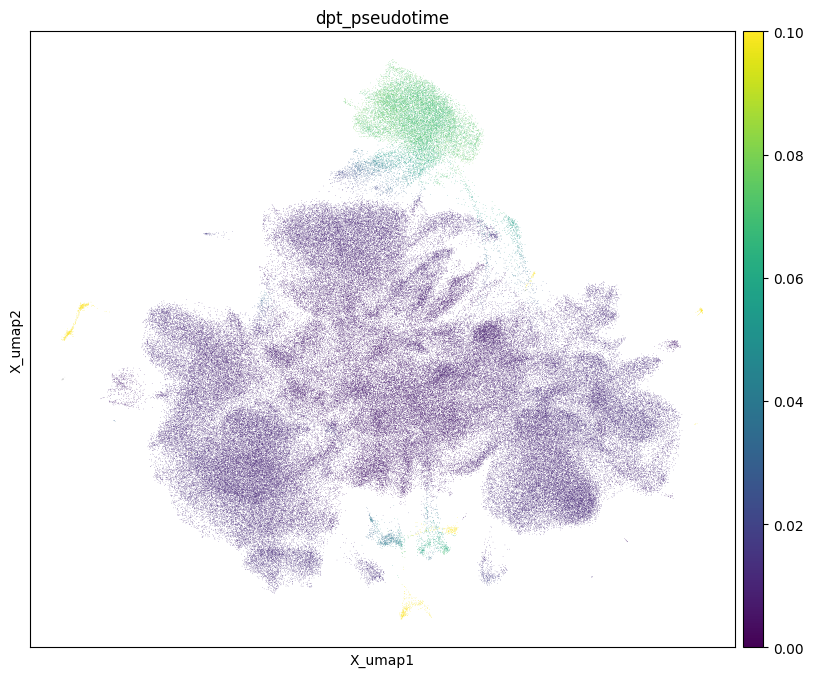

In [122]:
sc.pl.embedding(adata, basis='X_umap', color='dpt_pseudotime', color_map='viridis', vmax=0.1)


In [123]:
#Cell Rank Analysis

In [125]:
path = '/Users/shrey.parikh/Desktop/Repos/Organoid/lung_heoa_3khvg_dpt.h5ad'
adata.write(path)